# Sequences Visualized – Intuition Mines

## From Puzzles to Applications

Last time we solved consequetive sums with Gauss's method. Solving something like that may seem like merely puzzle solving. It's cool. It's elegant but is it more than an impressive trick? Is it useful? Where is the application?

Applications are what most people are interested in. After finding a new intuition, formula, or procedure it's time to look for applications. This is another endeavour that is both creative and analytical.

## Sequences

Consecutive sums is a sequence, a pattern that repeats. Sequences and patterns exist everywhere in nature. We relate to these patterns in nature visually, or with other senses. 

<img src="images/flower-2.jpg" height="250" width="250">

<span stype="font-size: 6px;">Photo by <a href="https://unsplash.com/@studiokiek?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Kiki Siepel</a></span>

Looking at lists of numbers is doesn't yield the same intuition that a visual representation of the sequence might. We're after more intution so that we can find applications. We are going to draw visualizations in the hopes of finding more intuition. Think of the visualizations as intuition mines.

Drawing by hand with paper and pencil is ideal. But since we're in a digital notebook, we'll use code to draw.

### Import Libraries for Drawing

In [3]:
from io import BytesIO

import cairo
import IPython.display
import math

## Drawing Units

We'll define a function to draw a single unit. Any simple shape will do. We'll use circles.

In [4]:
def draw_circle(ctx, x, y):
    ctx.set_line_width(0.45)
    ctx.arc(x, y, 0.22, 0, 2*math.pi)
    ctx.stroke()

# Test draw_circle
svg = BytesIO()
with cairo.SVGSurface(svg, 20, 20) as surface:
    ctx = cairo.Context(surface)
    ctx.scale(10, 10)
    draw_circle(ctx, 1, 1)
    
IPython.display.SVG(data=svg.getvalue())

## Draw Part of the Sequence

Now we'll define a function to draw one part of the sequence. The first part of the sequence will be a single circle, the second set will be two circles, then three circles, and so on. We'll lay the circles out in a flat row.

Looping the range will work well. As we loop we'll use the iterator to offset the x origin of the circle. If we didn't do this, it would draw all the circles in the same place and we'd only see one circle. When we call the function with the 5th number in the sequence we should expect 5 circles in a group.

In [5]:
def draw_sequence_part(ctx, number_in_sequence, x_origin, y_origin):
    for c in range(number_in_sequence):
        x_offset = c
        draw_circle(ctx, x_origin + x_offset, y_origin)
        
# Test draw_sequence_part   
svg = BytesIO()
with cairo.SVGSurface(svg, 100, 20) as surface:
    ctx = cairo.Context(surface)
    ctx.scale(10, 10)
    draw_sequence_part(ctx, 5, 1, 1)
    
IPython.display.SVG(data=svg.getvalue())

## First Sequence Drawing

We've got the low level drawing functions complete. Now the first basic, attempt to draw the sequence. Let's lay all the parts of the sequence flat from left to right, separated by horizontal space.

We can accomplish this by looping through `n` and drawing the sequence part each time. As we loop we keep offsetting the x origin to push the sequence parts across horizontal space.

The `x_offset` is the trickiest part. We keep adding to it each time we go up the sequence adding the `sequence_part + 1` to make sure the sequence part `x_origin` has some separation from the previous sequence part.

In [7]:
def draw_consecutive_sums_flat(ctx, n):
    x_offset = 1
    for sequence_part in range(1, n + 1):
        draw_sequence_part(ctx, sequence_part, x_offset, 1)
        x_offset += sequence_part + 1
        
# Test draw_consecutive_sums_flat   
svg = BytesIO()
with cairo.SVGSurface(svg, 1000, 20) as surface:
    ctx = cairo.Context(surface)
    ctx.scale(10, 10)
    draw_consecutive_sums_flat(ctx, 5)
    
IPython.display.SVG(data=svg.getvalue())

Now we have something drawn. But it doesn't give us much intuition. It more or less looks like the original sequence in math land.

```
1 + 2 + 3 + 4 + 5
```

We could make it even look the same if we wrote all the circles as ones.

```
(1) + (1 + 1) + (1 + 1 + 1) + (1 + 1 + 1 + 1) + (1 + 1 + 1 + 1 + 1)
```

Not much of an intuition mine. But now we have raw material to try some other drawings.

## Second Sequence Drawing

Let's experiment with how we separate the sequence parts. Rather than push them apart horizontally let's stack vertically.

The code is actually simpler than the flat version. `x_offset` is static and we can use the `sequence_part` iterator as the `y_offset`.

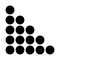

In [8]:
def draw_consecutive_sums_stacked(ctx, n):
    for sequence_part in range(1, n + 1):
        y_offset = sequence_part
        draw_sequence_part(ctx, sequence_part, 1, y_offset)
        
# Test draw_consecutive_sums_stacked
svg = BytesIO()
with cairo.SVGSurface(svg, 100, 60) as surface:
    ctx = cairo.Context(surface)
    ctx.scale(10, 10)
    draw_consecutive_sums_stacked(ctx, 5)
    
IPython.display.SVG(data=svg.getvalue())

Unlike the flat drawing, this visual is ripe for some intuition mining. It resembles several things we see in the real world. It looks like stairs going down. It looks like a steady slope. It looks like a wedge.

## Third Sequence Drawing

With just a little tweaking we could make this look like a triangle. We just need to add some `x_offset`.

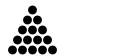

In [11]:
def draw_triangular_consecutive_sums(ctx, n):
    for sequence_part in range(1, n + 1):
        y_offset = sequence_part
        x_offset = 1 + (n * 0.55) - (sequence_part / 2)
        draw_sequence_part(ctx, sequence_part, x_offset, y_offset)
        
# Test draw_triangular_consecutive_sums
svg = BytesIO()
with cairo.SVGSurface(svg, 120, 55) as surface:
    ctx = cairo.Context(surface)
    ctx.scale(10, 10)
    draw_triangular_consecutive_sums(ctx, 5)

IPython.display.SVG(data=svg.getvalue())

## Intuition to Application

We could keep going. We could use the sequence to draw circular structures like spirals. We could draw in 3 dimmensions. But we'll stop here for now since we've got some new intuition.

We've established that consecutive sums is a sequence that describes real things like stairs and triangles to name a few. Do we have an application yet? Sure. We can now answer the question: How many blocks do you need to create a starway with 10 stairs? You don't have to draw and count. You can plug 10 into Gauss's formula for consecutive numbers.

There are other applications more powerful and general than stair calculation. We have a powerful formula to describe triangles! Triangles exist all over the place in nature. More than just physical shapes the concept of "Triangular Growth" might be a useful model to apply.

Next, we will see how "Triangular Growth" is another tool that can be used to find intuition about more complex visual structures. Once we do that we can convert complex visual structures into formulas because they link to triangles. Once we do that we will have gone full circ.e